# ========================================================================
# ==MIDS UC Berkeley, Machine Learning at Scale DATSCI W261 ASSIGNMENT No. 10==

Names Safyre Anderson, Howard Wen , Vamsi Sakhamuri
Emails safyre@berkeley.edu, howard.wen1@gmail.com, vamsi@ischool.berkeley.edu
Time of Initial Submission: March 29th, 2016 8am PST
Section W261-3, Spring 2016
Week 10 Homework


## ===HW 10.0: Short answer questions===

*What is Apache Spark and how is it different to Apache Hadoop?*

Like Apache Hadoop, Apache Spark is an open sourced Apache project. It was created to tackle the processing and analysis of big data--a similar application to Hadoop. Also like Hadoop, Spark employs a similar framework to Hadoop where a master node sends instructions to several nodes that contain fragments of the distributed dataset. However there are many key differences with Spark. In Spark, data are stored in RDDs, which are immutable and distributed among executors--Sparks analog to worker nodes. The key difference in sparks executors is that they store data in-memory, allowing much faster processing than Hadoop (which stores data into hard-disk). Furthermore, Hadoop supports iterative Map Reduce jobs, which not only do not allow interactivity, but also implements the jobs sequentially--usually with many reads and writes between tasks. Spark allows users to build applications or interact with their data through shell scripting (via Scala (base language), Python (pyspark), or R (SparkR)). Spark also employs lazy evaluation meaning it doesn't process data at every step of code--it will only create a new RDD after a blueprint of transformation steps is punctuated by an action step.


*Fill in the blanks:
Spark API consists of interfaces to develop applications based on it in Java, **Scala**, **Python**, and **R** languages (list languages).* 

*Using Spark, resource management can be done either in a single server instance or using a framework such as Mesos or **YARN** in a distributed manner.*


*What is an RDD and show a fun example of creating one and bringing the first element back to the driver program.*



RDD stands for resilient distributed data. It is Spark's unit of data--an immutable distributed data structure that is split and shared across Spark's executors until an action is performed. Because it is immutable, when the data need to be transformed, Spark does not manipulate the data inplace--instead it creates brand new RDDs. 

Here's an example with sample data inspired by: marketingdistillery.com
The format is 

`order date | order number | customer id | product id | order amount`

In [3]:
%%writefile example.txt
2014-01-01|236|30|P18|308
2014-01-01|237|40|P26|328
2014-01-02|238|74|P40|230
2014-01-02|239|7|P39|286

Writing example.txt


In [2]:
import os
import sys
import numpy as np

# launch pyspark 
spark_home = os.environ['SPARK_HOME']

if not spark_home:
    raise ValueError('SPARK_HOME enviroment variable is not set')
sys.path.insert(0,os.path.join(spark_home,'python'))
sys.path.insert(0,os.path.join(spark_home,'python/lib/py4j-0.9-src.zip'))
execfile(os.path.join(spark_home,'python/pyspark/shell.py'))

Welcome to
      ____              __
     / __/__  ___ _____/ /__
    _\ \/ _ \/ _ `/ __/  '_/
   /__ / .__/\_,_/_/ /_/\_\   version 1.6.0
      /_/

Using Python version 2.7.11 (default, Dec  6 2015 18:57:58)
SparkContext available as sc, HiveContext available as sqlContext.


In [10]:
# read the file as an rdd.  Spark will automatically parallelize it
from datetime import datetime
import csv
import StringIO
dataRDD = sc.textFile("example.txt")

# create a function to process data
def parse_lines(line):
    #line = line.split("|")
    # change date to datetime from string
    #line[0] = datetime.strptime(line[0], "%Y-%m-%d")
    line = StringIO.StringIO(line.strip().split("|"))
    reader = csv.DictReader(line, fieldnames = ['date','order_id','customer_id','product_id','order_amount'])
    return reader.next()
dataSplit= dataRDD.map(parse_lines).first()

print dataSplit

{'date': "[u'2014-01-01'", 'order_id': " u'236'", 'customer_id': " u'30'", 'product_id': " u'P18'", 'order_amount': " u'308']"}


*What is lazy evaluation and give an intuitive example of lazy evaluation and comment on the massive computational savings to be had from lazy evaluation.*

Lazy evaluation refers to the delay in processing until the last possible moment. Spark utilizes Lazy Evaluation with Big Data in mind. With large datasets, even simple processing can consume enormous compute power. If a job requires numerous sequential steps, processing each step as it occurs can be incredibly expensive. Instead, Spark remembers a blueprint of steps that lead to the final result and only processes those steps when an action such as collect() is called.


## ===HW 10.1: ===
*In Spark write the code to count how often each word appears in a text document (or set of documents). Please use this homework document as a the example document to run an experiment.  Report the following: provide a sorted list of tokens in decreasing order of frequency of occurence.*


In [35]:
hwText = sc.textFile("MIDS-MLS-HW-10.txt")
# split up the data into one big line
#then transform into word count pairs
# map, creates a (word, 1) key value pair
# reducebykey adds the counts for each key/word
# map again to swap keys and values so we can lastly
# sort by key, ascending = False
words = hwText.flatMap(lambda x: x.split(" ")).filter(lambda x: x.isalpha())
counts = words.map(lambda x: (x,1)) \
        .reduceByKey(lambda x, y: x+y) \
        .map(lambda x: (x[1], x[0])) \
        .sortByKey(False).collect()
for word, count in counts:
    print word, count

46 the
23 and
18 in
17 of
12 a
11 for
9 code
9 to
8 is
8 data
7 with
7 this
7 Using
7 on
7 your
6 KMeans
6 HW
5 from
5 as
4 What
4 Sum
4 Comment
4 Squared
4 each
4 linear
4 example
4 Set
4 clusters
3 report
3 words
3 available
3 lazy
3 training
3 count
3 Please
3 following
3 Spark
3 model
3 Errors
3 results
3 using
3 Within
3 x
3 import
3 after
3 plot
3 it
3 an
3 regression
3 document
3 provided
2 Apache
2 homework
2 list
2 per
2 Report
2 evaluation
2 run
2 here
2 iterations
2 RIDGE
2 word
2 NOTE
2 Generate
2 set
2 testing
2 vector
2 between
2 be
2 found
2 how
2 via
2 or
2 one
2 that
2 differences
2 up
2 any
2 decreasing
2 repeat
2 points
2 In
2 order
2 Fill
1 sameModel
1 load
1 all
1 intuitoive
1 consists
1 snippet
1 group
1 parameters
1 implementation
1 Modify
1 Here
1 languages
1 weeks
1 submissions
1 case
1 return
1 homeworks
1 compute
1 bringing
1 runs
1 resource
1 SPECIAL
1 Learning
1 where
1 findings
1 generation
1 Run
1 please
1 labeled
1 cell
1 above
1 math
1 This
1 interfaces

### HW 10.1.1
*Modify the above word count code to count words that begin with lower case letters (a-z) and report your findings. Again sort the output words in decreasing order of frequency.*

In [36]:
hwText = sc.textFile("MIDS-MLS-HW-10.txt")
# split up the data into one big line
#then transform into word count pairs
# map, creates a (word, 1) key value pair
# reducebykey adds the counts for each key/word
# map again to swap keys and values so we can lastly
# sort by key, ascending = False
words = hwText.flatMap(lambda x: x.split(" ")).filter(lambda x: x.isalpha() and x[0].islower())
counts = words.map(lambda x: (x,1)) \
        .reduceByKey(lambda x, y: x+y) \
        .map(lambda x: (x[1], x[0])) \
        .sortByKey(False).collect()
for word, count in counts:
    print word, count

46 the
23 and
18 in
17 of
12 a
11 for
9 code
9 to
8 is
8 data
7 with
7 this
7 on
7 your
5 from
5 as
4 clusters
4 each
4 linear
4 example
3 report
3 words
3 available
3 lazy
3 following
3 training
3 count
3 model
3 results
3 using
3 import
3 x
3 plot
3 it
3 an
3 regression
3 document
3 provided
3 after
2 homework
2 list
2 per
2 evaluation
2 run
2 here
2 iterations
2 word
2 found
2 set
2 testing
2 vector
2 between
2 be
2 how
2 via
2 or
2 one
2 that
2 differences
2 up
2 any
2 repeat
2 points
2 decreasing
2 order
1 sameModel
1 load
1 all
1 intuitoive
1 consists
1 snippet
1 group
1 parameters
1 implementation
1 distributed
1 languages
1 weeks
1 submissions
1 case
1 return
1 homeworks
1 compute
1 bringing
1 runs
1 resource
1 where
1 findings
1 generation
1 please
1 cell
1 above
1 math
1 interfaces
1 modify
1 not
1 based
1 column
1 completing
1 length
1 resulting
1 comment
1 letters
1 had
1 done
1 array
1 clustering
1 use
1 submit
1 forward
1 numpy
1 sort
1 form
1 tokens
1 labeled
1 fun
1 def

## ===HW 10.2: KMeans a la MLLib ===
*Using the following  MLlib-centric KMeans code snippet: 
Run this code snippet and list the clusters that your find and compute the Within Set Sum of Squared Errors for the found clusters. Comment on your findings.*

In [37]:
!wget -O kmeans_data.txt https://www.dropbox.com/s/q85t0ytb9apggnh/kmeans_data.txt?dl=0

--2016-03-29 05:18:04--  https://www.dropbox.com/s/q85t0ytb9apggnh/kmeans_data.txt?dl=0
Resolving www.dropbox.com... 108.160.172.238
Connecting to www.dropbox.com|108.160.172.238|:443... connected.
HTTP request sent, awaiting response... 302 FOUND
Location: https://dl.dropboxusercontent.com/content_link/c9I4izatYap9iiwP8kqFkPkspd0tvbh9Z2P5C7UghOJiwwshulppVLeLWrgSxOSQ/file [following]
--2016-03-29 05:18:06--  https://dl.dropboxusercontent.com/content_link/c9I4izatYap9iiwP8kqFkPkspd0tvbh9Z2P5C7UghOJiwwshulppVLeLWrgSxOSQ/file
Resolving dl.dropboxusercontent.com... 199.47.217.101
Connecting to dl.dropboxusercontent.com|199.47.217.101|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72 [text/plain]
Saving to: 'kmeans_data.txt'

kmeans_data.txt     100%[=====================>]      72  --.-KB/s   in 0s     

2016-03-29 05:18:06 (2.86 MB/s) - 'kmeans_data.txt' saved [72/72]



In [43]:
!cat kmeans_data.txt

0.0 0.0 0.0
0.1 0.1 0.1
0.2 0.2 0.2
9.0 9.0 9.0
9.1 9.1 9.1
9.2 9.2 9.2


In [42]:
from pyspark.mllib.clustering import KMeans, KMeansModel
from numpy import array
from math import sqrt

# Load and parse the data
# NOTE  kmeans_data.txt is available here 
#          https://www.dropbox.com/s/q85t0ytb9apggnh/kmeans_data.txt?dl=0 
data = sc.textFile("kmeans_data.txt")  
parsedData = data.map(lambda line: array([float(x) for x in line.split(' ')]))

# Build the model (cluster the data)
clusters = KMeans.train(parsedData, 2, maxIterations=10,
        runs=10, initializationMode="random")

# Evaluate clustering by computing Within Set Sum of Squared Errors
def error(point):
    center = clusters.centers[clusters.predict(point)]
    return sqrt(sum([x**2 for x in (point - center)]))

WSSSE = parsedData.map(lambda point: error(point)).reduce(lambda x, y: x + y)
print("Within Set Sum of Squared Error = " + str(WSSSE))

# Save and load model
# runs an error if the path already exists
try:
    clusters.save(sc, "myModelPath")
except:
    pass
sameModel = KMeansModel.load(sc, "myModelPath")

# print the cluster centers
for center in sameModel.clusterCenters:
    print center

Within Set Sum of Squared Error = 0.692820323028
[0.1,0.1,0.1]
[9.1,9.1,9.1]


Our Kmeans model generated two clusters with very distinct centers. One centered close to the origin (for the first 3 rows most likely) and the other centered around 9.1s (for the last 3 rows of training data). For each set of clusters, the sample data are all only 0.1 different for each feature. This is reflected in our low WSSSE, which calculates the minimum average distances (error) between each training point within a cluster and that cluster's centroid.

## ==HW 10.3: ===
Download the following KMeans notebook:

https://www.dropbox.com/s/3nsthvp8g2rrrdh/EM-Kmeans.ipynb?dl=0

*Generate 3 clusters with 100 (one hundred) data points per cluster (using the code provided). Plot the data.
Then run MLlib's Kmean implementation on this data  and report your results as follows:*

  - plot the resulting clusters after 1 iteration, 10 iterations, after 20 iterations, after 100 iterations.
  - in each plot please report the Within Set Sum of Squared Errors for the found clusters. Comment on the progress of this measure as the KMEans algorithms runs for more iterations


### Data generation from notebook

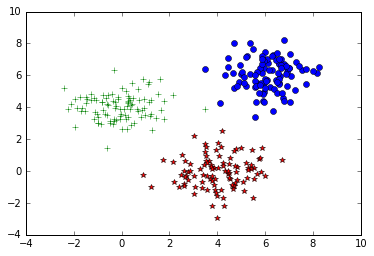

In [75]:
%matplotlib inline
import numpy as np
import pylab 
import json
size1 = size2 = size3 = 100
samples1 = np.random.multivariate_normal([4, 0], [[1, 0],[0, 1]], size1)
data = samples1
samples2 = np.random.multivariate_normal([6, 6], [[1, 0],[0, 1]], size2)
data = np.append(data,samples2, axis=0)
samples3 = np.random.multivariate_normal([0, 4], [[1, 0],[0, 1]], size3)
data = np.append(data,samples3, axis=0)

# Randomize data
data = data[np.random.permutation(size1+size2+size3),]
np.savetxt('data.csv',data,delimiter = ',')

pylab.plot(samples1[:, 0], samples1[:, 1],'*', color = 'red')
pylab.plot(samples2[:, 0], samples2[:, 1],'o',color = 'blue')
pylab.plot(samples3[:, 0], samples3[:, 1],'+',color = 'green')
pylab.show()

### Helper Functions

In [84]:
#Calculate which class each data point belongs to
def nearest_centroid(line):
    x = np.array([float(f) for f in line.split(',')])
    closest_centroid_idx = np.sum((x - centroids)**2, axis=1).argmin()
    return (closest_centroid_idx,(x,1))

#plot centroids and data points for each iteration
def plot_iteration(means):
    pylab.plot(samples1[:, 0], samples1[:, 1], '.', color = 'blue')
    pylab.plot(samples2[:, 0], samples2[:, 1], '.', color = 'blue')
    pylab.plot(samples3[:, 0], samples3[:, 1],'.', color = 'blue')
    pylab.plot(means[0][0], means[0][1],'*',markersize =10,color = 'red')
    pylab.plot(means[1][0], means[1][1],'*',markersize =10,color = 'red')
    pylab.plot(means[2][0], means[2][1],'*',markersize =10,color = 'red')
    pylab.show()
    
# calculate WSSSE
#WSSSE = Data.map(lambda point: error(point)).reduce(lambda x, y: x + y)
# Evaluate clustering by computing Within Set Sum of Squared Errors
def error2(point, center):
    #center = clusters.centers[clusters.predict(point)]
    return sqrt(sum([(i-j)**2 for i,j in zip(point, center)]))

### Kmeans

Iteration1
[[ 1.83142117 -0.64359973]
 [ 3.99541437  2.69966029]
 [ 1.87101289  5.51856852]]
1483.73158435


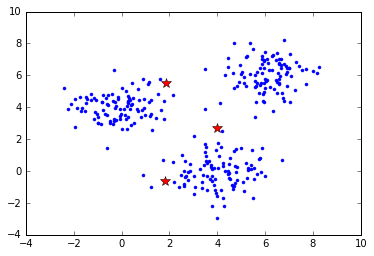

Iteration10
[[ 4.01487044 -0.05763602]
 [ 6.0829721   6.02072743]
 [-0.13255921  4.0315548 ]]
1648.69113081


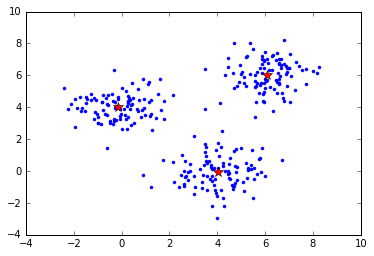

Iteration20
[[ 4.01487044 -0.05763602]
 [ 6.0829721   6.02072743]
 [-0.13255921  4.0315548 ]]
1648.69113081


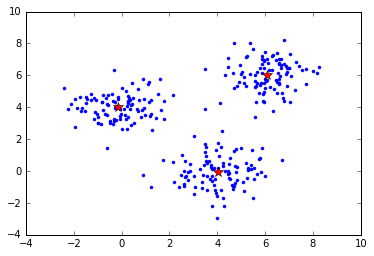

Iteration100
[[ 4.01487044 -0.05763602]
 [ 6.0829721   6.02072743]
 [-0.13255921  4.0315548 ]]
1648.69113081


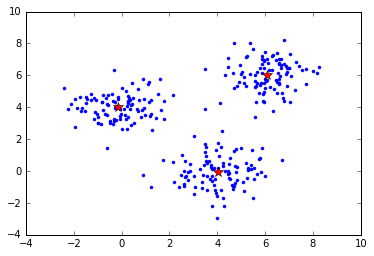

Final Results:
[[ 4.01487044 -0.05763602]
 [ 6.0829721   6.02072743]
 [-0.13255921  4.0315548 ]]
1648.69113081


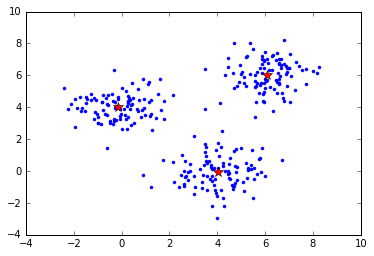

In [86]:
from numpy import array
import numpy as np

K = 3
# Initialization: initialization of parameter is fixed to show an example
centroids = np.array([[0.0,0.0],[2.0,2.0],[0.0,7.0]])

# read and cache data in memory
D = sc.textFile("./data.csv").cache()

iter_num = 0
for i in range(100):  
    # cluster, points, cluster_size
    res = D.map(nearest_centroid).reduceByKey(lambda x,y : (x[0]+y[0],x[1]+y[1])).collect()
    #res [(0, (array([  2.66546663e+00,   3.94844436e+03]), 1001)  ), 
    #     (2, (array([ 6023.84995923,  5975.48511018]), 1000)), 
    #     (1, (array([ 3986.85984761,    15.93153464]), 999))]
    # res[1][1][1] returns 1000 here'
    res = sorted(res,key = lambda x : x[0])  #sort based on clusted ID
    centroids_new = np.array([x[1][0]/x[1][1] for x in res])  #divide by cluster size
    # Stops at 7 iterations, can't see more unless
    # we comment out
    #if np.sum(np.absolute(centroids_new-centroids))<0.00001:
    #    break
    iter_num = iter_num + 1 
    centroids = centroids_new
    if iter_num in [1,10,20,100]:
        print "Iteration" + str(iter_num)
        print centroids
        WSSSE = 0
        SSE = [0,0,0]
        for row in res:
            SSE[row[0]] += error2(row[1][0], centroids[row[0]])
        WSSSE = np.sum(SSE)
        print WSSSE
        plot_iteration(centroids)
print "Final Results:"
print centroids
WSSSE = 0
SSE = [0,0,0]
for row in res:
    SSE[row[0]] += error2(row[1][0], centroids[row[0]])
    #res.map(lambda row: (row[0], error(row[1],centroids[row[0]]))).reduce(lambda x, y: x + y)
WSSSE = np.sum(SSE)
print WSSSE
plot_iteration(centroids)

Even with a very strict stopping condition (differences in centroid points < 0.001), the model converged after 7 iterations. Thus, there is no change in the centroids coordinates or the WSSSE in the subsequent iterations.

## ==HW 10.4: ===
*Using the KMeans code (homegrown code) provided repeat the experiments in HW10.3. Comment on any differences between the results in HW10.3 and HW10.4. Explain.*

In [81]:
from pyspark.mllib.clustering import KMeans, KMeansModel
from numpy import array
from math import sqrt

# Load and parse the data
# NOTE  kmeans_data.txt is available here 
#          https://www.dropbox.com/s/q85t0ytb9apggnh/kmeans_data.txt?dl=0 
data = sc.textFile("./data.csv").cache()
parsedData = data.map(lambda line: array([float(x) for x in line.split(',')]))

# Build the model (cluster the data)
clusters = KMeans.train(parsedData, 3, maxIterations=10,
        runs=10, initializationMode="random")

# Evaluate clustering by computing Within Set Sum of Squared Errors
def error(point):
    center = clusters.centers[clusters.predict(point)]
    return sqrt(sum([x**2 for x in (point - center)]))

WSSSE = parsedData.map(lambda point: error(point)).reduce(lambda x, y: x + y)
print("Within Set Sum of Squared Error = " + str(WSSSE))

# Save and load model
# runs an error if the path already exists
try:
    clusters.save(sc, "myModelPath2")
except:
    pass
sameModel = KMeansModel.load(sc, "myModelPath2")

# print the cluster centers
for center in clusters.clusterCenters:
    print center

Within Set Sum of Squared Error = 365.441569723
[ 4.01487044 -0.05763602]
[-0.13255921  4.0315548 ]
[ 6.0829721   6.02072743]


ANSWER FROM 10.3

`[[ 4.01487044 -0.05763602]
 [ 6.0829721   6.02072743]
 [-0.13255921  4.0315548 ]]`
 
 The final centroid coordinates for 3 clusters are exactly the same for both Kmeans scripts. This is despite different initialized centroid coordinates. Because Kmeans is a non supervised and relatively simple clustering algorithm, this robustness in answers is likely an artifact of our simple training data: low dimensionality, artificially produce samples, and small sample size.  However the WSSSE here is much lower at 365 vs 1650 for 10.3. This may be due to a programming error, but I haven't figured out how the calculation might have been done differently/incorrectly--it looks like the same math to me!